<h1>Voting Classifier<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Chargement-des-données" data-toc-modified-id="Chargement-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Chargement des données</a></span></li><li><span><a href="#SPLITTING" data-toc-modified-id="SPLITTING-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>SPLITTING</a></span></li><li><span><a href="#Chargement-des-modèles" data-toc-modified-id="Chargement-des-modèles-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Chargement des modèles</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>LGBM</a></span></li></ul></li><li><span><a href="#Metrics¶" data-toc-modified-id="Metrics¶-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metrics¶</a></span></li><li><span><a href="#Base-predictions" data-toc-modified-id="Base-predictions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Base predictions</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>LGBM</a></span></li></ul></li><li><span><a href="#Voting-Classifier" data-toc-modified-id="Voting-Classifier-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Voting Classifier</a></span></li><li><span><a href="#Comparaison-des-scores" data-toc-modified-id="Comparaison-des-scores-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Comparaison des scores</a></span></li></ul></div>

Dans ce notebook ensemble voting sur lr, randomforest et lgbm optimisés précédament

    * partie 1 : fiche prédiction de chaque modèle
    
    * partie 2 : fiche prediction out of bag voting classifier
    
    * partie 3 : enregistrement du pipeline




# Imports

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
pd.set_option('display.max_row', 244)
pd.set_option('display.max_column', 243)
pd.set_option('display.max_colwidth', 50)

# graphical libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go


# misc libaries
import missingno as msno
bleu = (70 / 255, 130 / 255, 180 / 255)
# import dataprep.eda as eda
import qgrid

# File system manangement
import os
import joblib 

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 1
%aimport Functions
from Functions import *

Loading functions ...


.... done.


In [3]:
# CONSTANTS

EDA = 'EDA 1-7 all features_aggregated'

# Chargement des données




In [4]:
# local run
path='FEATURES/'
features = joblib.load ( path+EDA+'.feat')

# Kaggle run
# path='../input/projet-07/' 
# features = joblib.load ( path+EDA+'.feat')


Vérification du chargement

<AxesSubplot:>

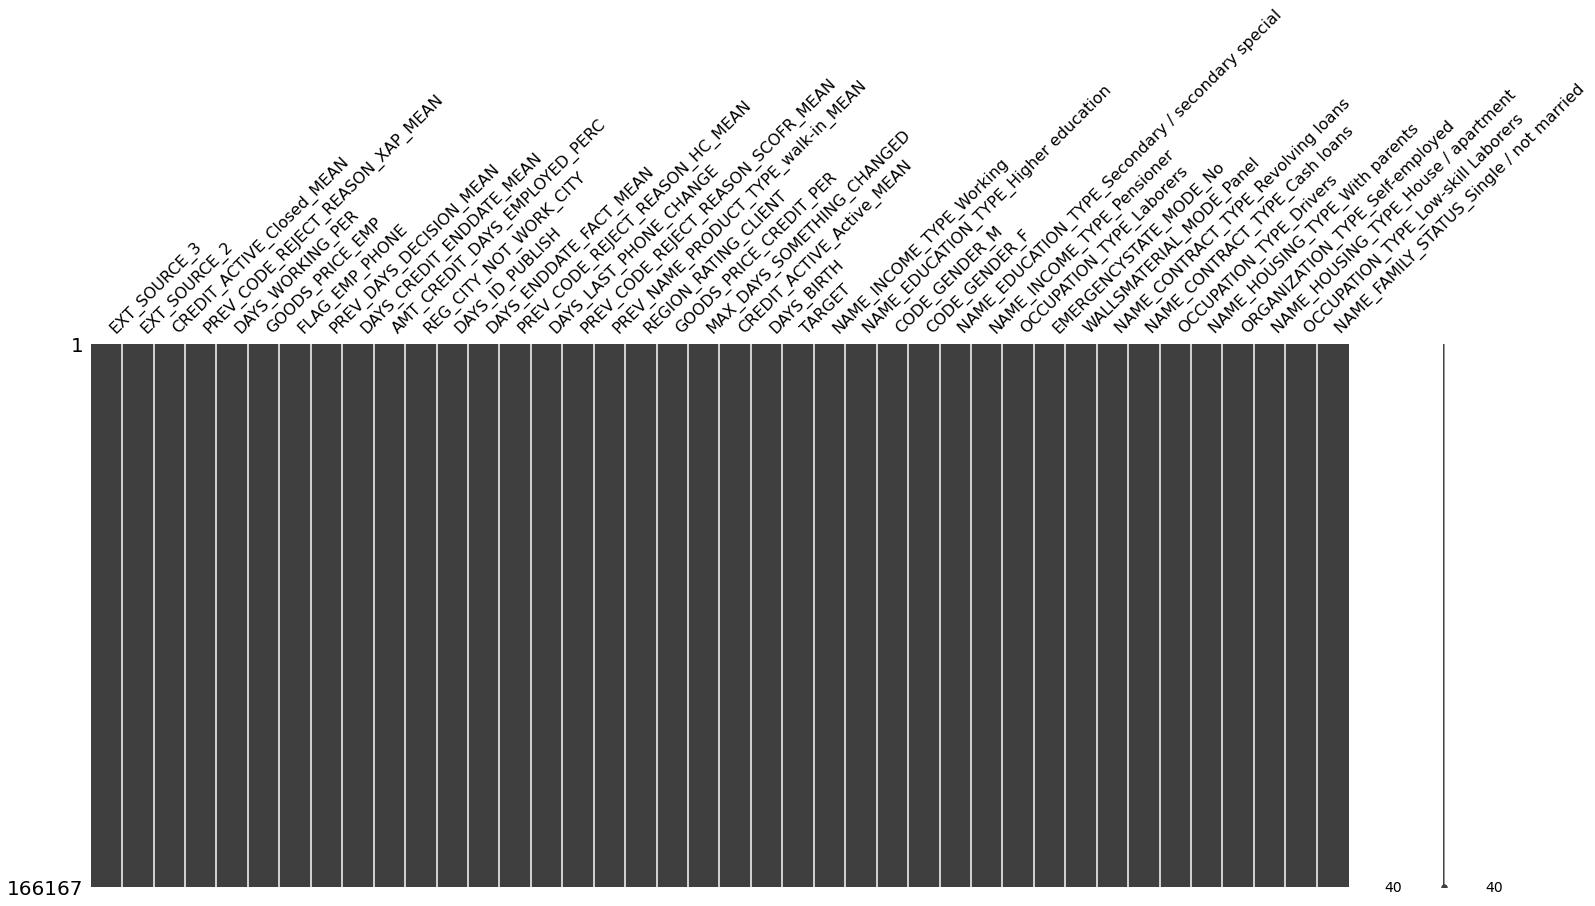

In [5]:
msno.matrix(features)

In [6]:
# Features overwiew
from collections import Counter

display(features)
print('Features shape {} x {}'.format(features.shape[0],features.shape[1]))
# TARGET ration on whole dataset
print('TARGET ratio {:.8%}'.format(features.TARGET.value_counts()[1]/features.TARGET.value_counts()[0]) )
print(Counter(features.TARGET))

,EXT_SOURCE_3,EXT_SOURCE_2,CREDIT_ACTIVE_Closed_MEAN,PREV_CODE_REJECT_REASON_XAP_MEAN,DAYS_WORKING_PER,GOODS_PRICE_EMP,FLAG_EMP_PHONE,PREV_DAYS_DECISION_MEAN,DAYS_CREDIT_ENDDATE_MEAN,AMT_CREDIT_DAYS_EMPLOYED_PERC,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_ENDDATE_FACT_MEAN,PREV_CODE_REJECT_REASON_HC_MEAN,DAYS_LAST_PHONE_CHANGE,PREV_CODE_REJECT_REASON_SCOFR_MEAN,PREV_NAME_PRODUCT_TYPE_walk-in_MEAN,REGION_RATING_CLIENT,GOODS_PRICE_CREDIT_PER,MAX_DAYS_SOMETHING_CHANGED,CREDIT_ACTIVE_Active_MEAN,DAYS_BIRTH,TARGET,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER_M,CODE_GENDER_F,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Pensioner,OCCUPATION_TYPE_Laborers,EMERGENCYSTATE_MODE_No,WALLSMATERIAL_MODE_Panel,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_Cash loans,OCCUPATION_TYPE_Drivers,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Self-employed,NAME_HOUSING_TYPE_House / apartment,OCCUPATION_TYPE_Low-skill Laborers,NAME_FAMILY_STATUS_Single / not married
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0.139376,0.262949,0.750000,1.00,0.067329,0.001815,1,-606.000000,-349.000000,-0.001567,0,-2120,-697.500000,0.00,-1134.0,0.0,0.00,2,1.158397,-637.0,0.250000,-9461,1,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1
100004,0.729567,0.555912,1.000000,1.00,0.011814,0.001667,1,-815.000000,-488.500000,-0.001667,0,-2531,-532.500000,0.00,-815.0,0.0,0.00,2,1.000000,-225.0,0.000000,-19046,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1
100008,0.621226,0.354225,0.666667,1.00,0.093737,0.003494,1,-1192.000000,-391.333333,-0.003238,0,-477,-909.000000,0.00,-2536.0,0.0,0.00,2,1.079198,-477.0,0.333333,-16941,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0
100009,0.492060,0.724000,0.777778,1.00,0.227174,0.002244,1,-719.285714,-794.937500,-0.002005,0,-619,-1108.500000,0.00,-1562.0,0.0,0.00,2,1.118800,-619.0,0.222222,-13778,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
100010,0.540654,0.714279,0.500000,1.00,0.023820,0.000293,1,-1070.000000,-119.500000,-0.000293,1,-2379,-1138.000000,0.00,-1070.0,0.0,0.00,3,1.000000,-449.0,0.500000,-18850,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456246,0.735221,0.313334,0.666667,1.00,0.543859,0.038827,1,-897.000000,-234.666667,-0.038827,1,-4531,-1331.000000,0.00,-1516.0,0.0,0.00,2,1.000000,-4531.0,0.333333,-16063,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0
456247,0.609276,0.501221,0.727273,0.80,0.033614,0.001612,1,-1387.800000,1449.818182,-0.001155,0,-3936,-1085.000000,0.20,-2315.0,0.0,0.00,2,1.396000,-399.0,0.272727,-11870,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
456253,0.218859,0.535722,0.500000,1.00,0.529266,0.013540,1,-2380.000000,280.500000,-0.011689,1,-5150,-794.000000,0.00,-1909.0,0.0,0.00,3,1.158400,-5150.0,0.500000,-14966,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0


Features shape 166167 x 40
TARGET ratio 8.55196112%
Counter({0: 153076, 1: 13091})


In [7]:
# Descriptive Statistics of features
features.describe()

,EXT_SOURCE_3,EXT_SOURCE_2,CREDIT_ACTIVE_Closed_MEAN,PREV_CODE_REJECT_REASON_XAP_MEAN,DAYS_WORKING_PER,GOODS_PRICE_EMP,FLAG_EMP_PHONE,PREV_DAYS_DECISION_MEAN,DAYS_CREDIT_ENDDATE_MEAN,AMT_CREDIT_DAYS_EMPLOYED_PERC,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_ENDDATE_FACT_MEAN,PREV_CODE_REJECT_REASON_HC_MEAN,DAYS_LAST_PHONE_CHANGE,PREV_CODE_REJECT_REASON_SCOFR_MEAN,PREV_NAME_PRODUCT_TYPE_walk-in_MEAN,REGION_RATING_CLIENT,GOODS_PRICE_CREDIT_PER,MAX_DAYS_SOMETHING_CHANGED,CREDIT_ACTIVE_Active_MEAN,DAYS_BIRTH,TARGET,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER_M,CODE_GENDER_F,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Pensioner,OCCUPATION_TYPE_Laborers,EMERGENCYSTATE_MODE_No,WALLSMATERIAL_MODE_Panel,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_Cash loans,OCCUPATION_TYPE_Drivers,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Self-employed,NAME_HOUSING_TYPE_House / apartment,OCCUPATION_TYPE_Low-skill Laborers,NAME_FAMILY_STATUS_Single / not married
count,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000
mean,0.510254,0.522642,0.653379,0.862457,0.167316,0.007263,0.999958,-960.521684,530.334778,-0.006516,0.269277,-2930.144674,-948.376072,0.061706,-1068.932953,0.005888,0.081658,2.055155,1.121982,-1432.258649,0.342891,-15032.894594,0.078782,0.634380,0.268224,0.363875,0.636101,0.687832,0.000048,0.217281,0.525772,0.217841,0.093159,0.906841,0.072523,0.052080,0.142922,0.883238,0.006933,0.136549
std,0.194889,0.186316,0.224893,0.197724,0.138021,0.011067,0.006490,568.583412,2591.803993,0.009935,0.443586,1485.687941,512.259742,0.133164,825.083618,0.043194,0.177446,0.499675,0.124831,1181.062229,0.223960,3555.439786,0.269399,0.481605,0.443036,0.481115,0.481122,0.463379,0.006938,0.412397,0.499337,0.412780,0.290656,0.290656,0.259353,0.222189,0.349995,0.321138,0.082974,0.343372
min,0.000527,0.000010,0.000000,0.000000,0.000042,0.000002,0.000000,-2922.000000,-28039.000000,-0.256178,0.000000,-7197.000000,-2884.000000,0.000000,-4173.000000,0.000000,0.000000,1.000000,0.150000,-6226.000000,0.000000,-25200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370650,0.411550,0.500000,0.750000,0.061777,0.001720,1.000000,-1297.000000,-711.000000,-0.007465,0.000000,-4239.000000,-1269.500000,0.000000,-1684.000000,0.000000,0.000000,2.000000,1.000000,-2094.000000,0.187500,-17721.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.537070,0.573477,0.666667,1.000000,0.130267,0.003899,1.000000,-845.333333,-197.000000,-0.003506,0.000000,-3076.000000,-916.000000,0.000000,-929.000000,0.000000,0.000000,2.000000,1.118800,-1094.000000,0.333333,-14834.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.667458,0.666053,0.800000,1.000000,0.234369,0.008310,1.000000,-512.464286,505.950000,-0.001541,1.000000,-1696.000000,-565.633333,0.000000,-376.000000,0.000000,0.083333,2.000000,1.198000,-495.000000,0.500000,-12168.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.885488,0.855000,1.000000,1.000000,0.728811,0.256178,1.000000,-2.000000

# SPLITTING

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(features,
                               test_size=.2,
                               random_state=42,
                               shuffle=True,
                               stratify=features.TARGET)

train_true = train.pop('TARGET')
print('train',train.shape)
print('TARGET=1 ratio on train {:.8%}'.format(train_true.value_counts()[1]/train_true.value_counts()[0]) )
test_true = test.pop('TARGET')
print('test',test.shape)
print('TARGET=1 ratio on test {:.8%}'.format(test_true.value_counts()[1]/test_true.value_counts()[0]))

train (132933, 39)
TARGET=1 ratio on train 8.55218030%
test (33234, 39)
TARGET=1 ratio on test 8.55108440%


# Chargement des modèles

## Logistic Regression

In [9]:
LR = joblib.load ('Models/logistic_regression_optimized_fitted.mod')
LR.get_params(deep=False)

{'memory': None,
 'steps': [('over',
   RandomOverSampler(random_state=42, sampling_strategy=0.12496086406604352)),
  ('under',
   RandomUnderSampler(random_state=42, sampling_strategy=0.24875095137776715)),
  ('scaler', RobustScaler(unit_variance=True)),
  ('model',
   LogisticRegression(C=387.7896540335958, class_weight='balanced', max_iter=1000,
                      n_jobs=-1, random_state=42, tol=2.4770441141413036e-05))],
 'verbose': False}

## Random Forest

In [10]:
RF = joblib.load ('Models/random_forest_optimized_fitted.mod')
RF.get_params(deep=False)

{'memory': None,
 'steps': [('over',
   RandomOverSampler(random_state=42, sampling_strategy=0.12355964682885018)),
  ('under',
   RandomUnderSampler(random_state=42, sampling_strategy=0.21625511024930952)),
  ('scaler',
   QuantileTransformer(n_quantiles=10000, output_distribution='normal',
                       random_state=42)),
  ('model',
   RandomForestClassifier(class_weight='balanced', max_depth=7,
                          max_features='log2', n_estimators=180, n_jobs=-1,
                          oob_score=True, random_state=42))],
 'verbose': False}

## LGBM

In [11]:
LGBM = joblib.load ('Models/lgbm_optimized_fitted.mod')
LGBM.get_params(deep=False)

{'memory': None,
 'steps': [('over',
   RandomOverSampler(random_state=42, sampling_strategy=0.09246281160535307)),
  ('under',
   RandomUnderSampler(random_state=42, sampling_strategy=0.10246981238318863)),
  ('scaler',
   QuantileTransformer(n_quantiles=10000, output_distribution='normal',
                       random_state=42)),
  ('model',
   LGBMClassifier(boosting_type='dart', class_weight='balanced',
                  importance_type='gain', learning_rate=0.7132707614188026,
                  max_depth=8, metric='binary_logloss',
                  min_split_gain=0.5460401638083019, n_estimators=185,
                  objective='binary', random_state=42, reg_alpha=63.53249436638803,
                  reg_lambda=11.075030110904528, subsample=0.08269078501941346,
                  subsample_for_bin=10000))],
 'verbose': False}

#  Metrics¶

In [12]:
from sklearn.metrics import  confusion_matrix, make_scorer, roc_auc_score

# Cost weight
tn_cost = 2  ; fn_cost = -5
fp_cost = -6  ; tp_cost = 1

penalty = np.array([tn_cost,fn_cost,fp_cost,tp_cost])

# cost function
def cost(y,y_pred):
    cm = confusion_matrix(y,y_pred,normalize='true')
    return  (sum( cm.reshape(-1)*penalty)+11)/14

SCORER = {'AUC' : 'roc_auc', 'COST' : make_scorer(cost)}

# Base predictions

In [13]:
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

## Logistic Regression

TRAIN
               precision    recall  f1-score   support

           0       0.96      0.69      0.80    122460
           1       0.16      0.67      0.25     10473

    accuracy                           0.69    132933
   macro avg       0.56      0.68      0.53    132933
weighted avg       0.90      0.69      0.76    132933

 Scores  on train : {'COST': 0.6817472552954342, 'AUC': 0.7428749727814841}
TEST
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     30616
           1       0.15      0.66      0.25      2618

    accuracy                           0.69     33234
   macro avg       0.56      0.68      0.53     33234
weighted avg       0.90      0.69      0.76     33234

 Scores  on test : {'COST': 0.6763024591265111}


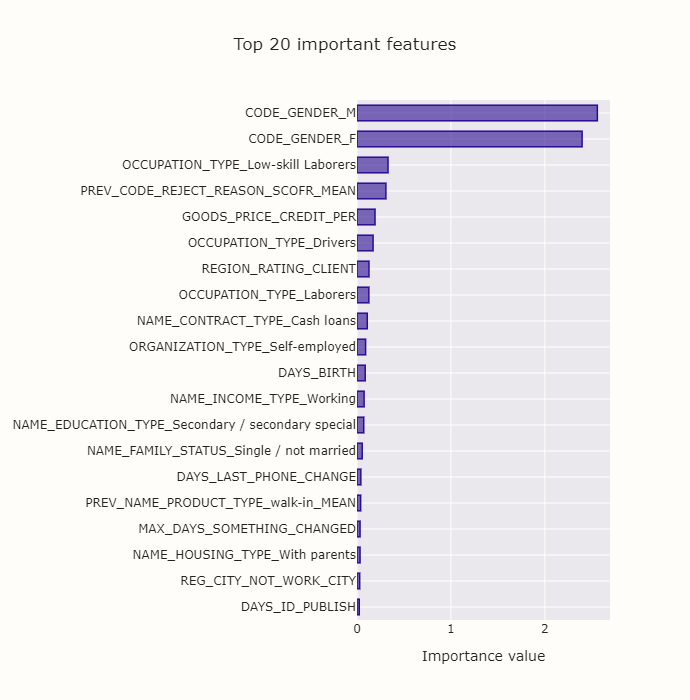

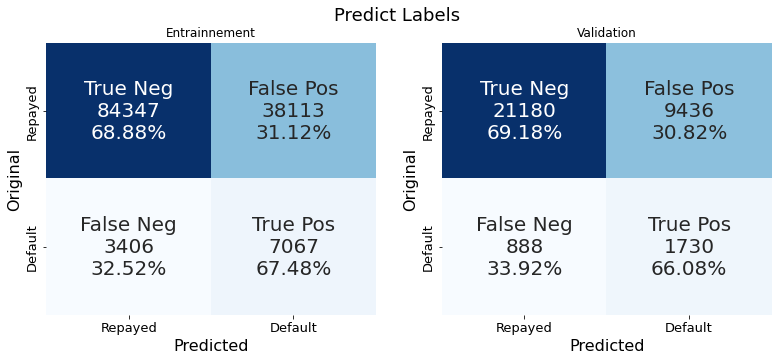

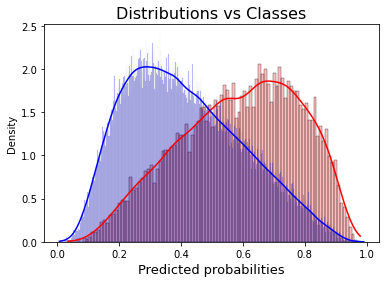

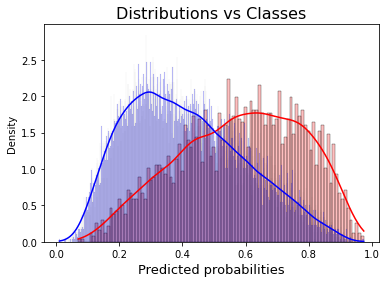

In [14]:
# fit model on train
LR.fit(train, train_true)

# evaluate
evaluate_estimator(LR,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv)

# Distribution of prediction probabilities versus classes
train_predicted_probas = LR.predict_proba(train)
proba_distributions(train_true,train_predicted_probas)

# Distribution of prediction probabilities versus classes
test_predicted_probas = LR.predict_proba(test)
proba_distributions(test_true,test_predicted_probas)

# Feature importance
feature_importance_plot(LR[-1].coef_[0],train)

## Random Forest

TRAIN
               precision    recall  f1-score   support

           0       0.96      0.71      0.82    122460
           1       0.17      0.69      0.27     10473

    accuracy                           0.71    132933
   macro avg       0.57      0.70      0.54    132933
weighted avg       0.90      0.71      0.78    132933

 Scores  on train : {'COST': 0.674362438833594, 'AUC': 0.7372555992705871}
TEST
               precision    recall  f1-score   support

           0       0.96      0.71      0.82     30616
           1       0.16      0.64      0.25      2618

    accuracy                           0.70     33234
   macro avg       0.56      0.67      0.53     33234
weighted avg       0.90      0.70      0.77     33234

 Scores  on test : {'COST': 0.6739348903682432}


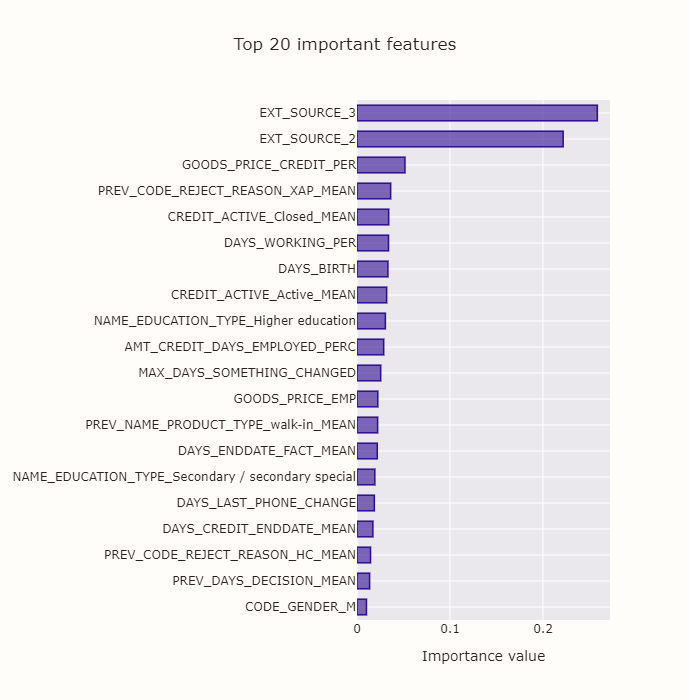

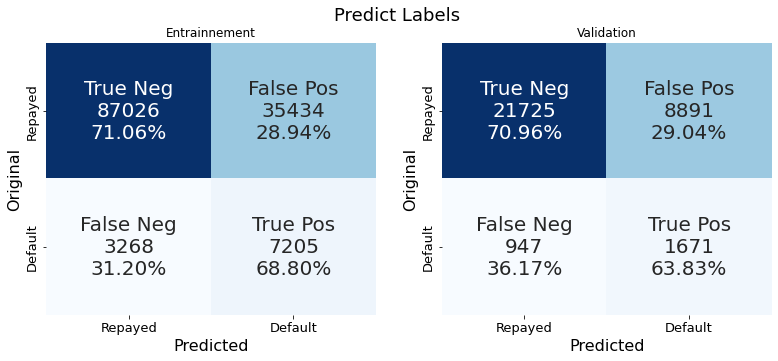

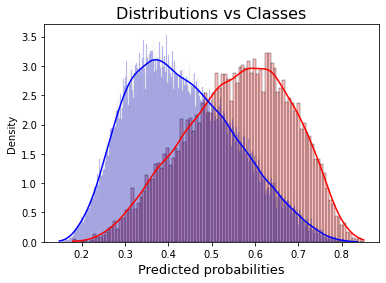

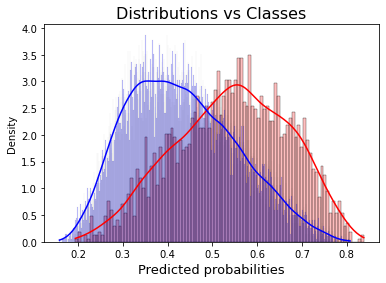

In [15]:
# fit model on train
RF.fit(train, train_true)

# evaluate
evaluate_estimator(RF,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv)

# Distribution of prediction probabilities versus classes
train_predicted_probas = RF.predict_proba(train)
proba_distributions(train_true,train_predicted_probas)

# Distribution of prediction probabilities versus classes
test_predicted_probas = RF.predict_proba(test)
proba_distributions(test_true,test_predicted_probas)

# Feature importance
feature_importance_plot(RF[-1].feature_importances_,train)

## LGBM

TRAIN
               precision    recall  f1-score   support

           0       0.97      0.72      0.82    122460
           1       0.18      0.73      0.29     10473

    accuracy                           0.72    132933
   macro avg       0.57      0.72      0.56    132933
weighted avg       0.91      0.72      0.78    132933

 Scores  on train : {'COST': 0.6778583335971062, 'AUC': 0.7415483817234829}
TEST
               precision    recall  f1-score   support

           0       0.96      0.71      0.82     30616
           1       0.16      0.65      0.26      2618

    accuracy                           0.71     33234
   macro avg       0.56      0.68      0.54     33234
weighted avg       0.90      0.71      0.77     33234

 Scores  on test : {'COST': 0.6793273982277425}


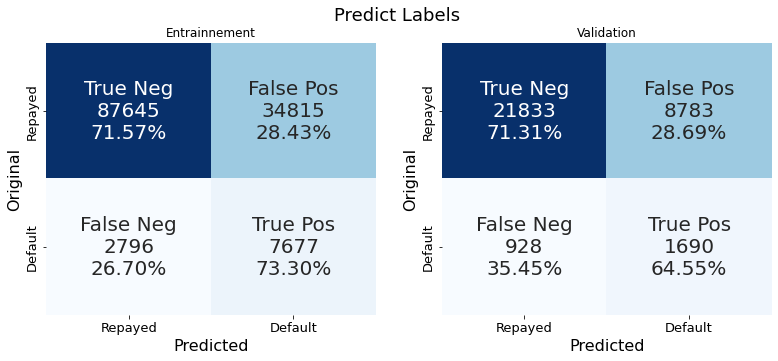

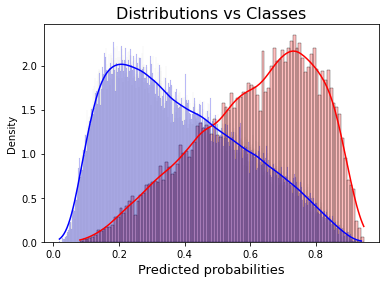

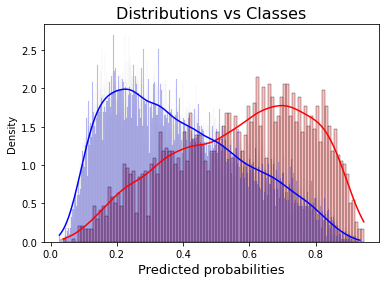

In [16]:
# fit model on train
LGBM.fit(train, train_true)

# evaluate
evaluate_estimator(LGBM,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv)

# Distribution of prediction probabilities versus classes
train_predicted_probas = LGBM.predict_proba(train)
proba_distributions(train_true,train_predicted_probas)

# Distribution of prediction probabilities versus classes
test_predicted_probas = LGBM.predict_proba(test)
proba_distributions(test_true,test_predicted_probas)

# Feature importance
feature_importance_plot(LGBM[-1].feature_importances_,train)

# Voting Classifier

In [17]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('lr', LR), ('rf', RF), ('lgbm', LGBM)],
                          voting='soft',
                          weights=None,
                          n_jobs=4,
                          flatten_transform=True)
voting.get_params(deep=False)

{'estimators': [('lr',
   Pipeline(steps=[('over',
                    RandomOverSampler(random_state=42,
                                      sampling_strategy=0.12496086406604352)),
                   ('under',
                    RandomUnderSampler(random_state=42,
                                       sampling_strategy=0.24875095137776715)),
                   ('scaler', RobustScaler(unit_variance=True)),
                   ('model',
                    LogisticRegression(C=387.7896540335958,
                                       class_weight='balanced', max_iter=1000,
                                       n_jobs=-1, random_state=42,
                                       tol=2.4770441141413036e-05))])),
  ('rf',
   Pipeline(steps=[('over',
                    RandomOverSampler(random_state=42,
                                      sampling_strategy=0.12355964682885018)),
                   ('under',
                    RandomUnderSampler(random_state=42,
                      

TRAIN
               precision    recall  f1-score   support

           0       0.97      0.71      0.82    122460
           1       0.17      0.70      0.28     10473

    accuracy                           0.71    132933
   macro avg       0.57      0.71      0.55    132933
weighted avg       0.90      0.71      0.78    132933

 Scores  on train : {'COST': 0.6818155245084594, 'AUC': 0.745880164309537}
TEST
               precision    recall  f1-score   support

           0       0.96      0.71      0.82     30616
           1       0.16      0.64      0.26      2618

    accuracy                           0.71     33234
   macro avg       0.56      0.68      0.54     33234
weighted avg       0.90      0.71      0.77     33234

 Scores  on test : {'COST': 0.6766399899152477}


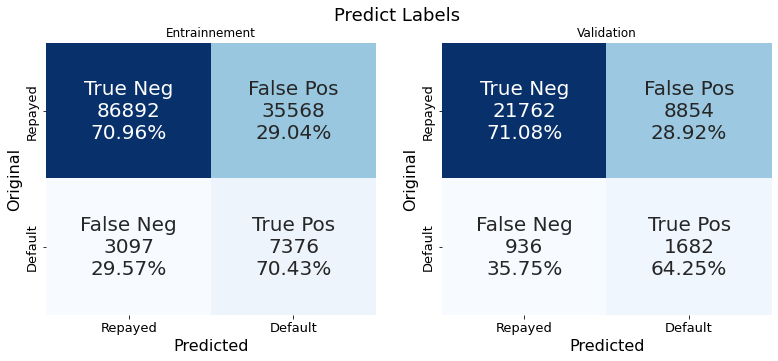

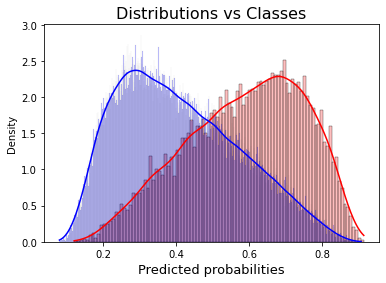

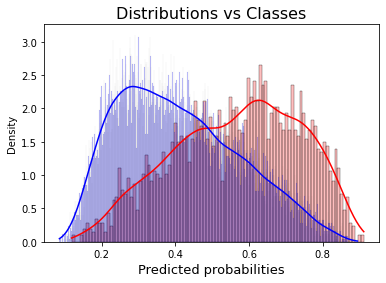

In [18]:
# fit
voting.fit(train,train_true)
# evaluate
evaluate_estimator(voting,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv)

# Distribution of prediction probabilities versus classes
train_predicted_probas = voting.predict_proba(train)
proba_distributions(train_true,train_predicted_probas)

# Distribution of prediction probabilities versus classes
test_predicted_probas = voting.predict_proba(test)
proba_distributions(test_true,test_predicted_probas)

# Comparaison des scores

In [19]:
# list of all models for prediction comparison
def get_models():
    models = dict()
    models['lr'] = LR
    models['rf'] = RF
    models['lgbm'] = LGBM
    models['voting'] = voting
    return models

In [20]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv_box = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    scores = cross_validate(model, X, y, scoring=SCORER, cv=cv_box, n_jobs=-1, error_score='raise')
    return scores

In [21]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
train_cv, fit_time_cv, cost_test, names = list(), list(), list(), list()
for name, model in models.items():
    scores = evaluate_model(model, train, train_true)
    cost_scores = scores['test_COST']
    fitting_times = scores['fit_time']
    test_score = cost(test_true, model.predict(test))
    print('>%s cv cost score mean: %.4f (\u00B1 %.4f) fitted in %.3f s (\u00B1 %.3f s)' % (name,
                                                                                        cost_scores.mean(),
                                                                                        cost_scores.std(),
                                                                                        fitting_times.mean(),
                                                                                        fitting_times.std()
                                                                                       )
         )
    train_cv.append(cost_scores)
    fit_time_cv.append(fitting_times)
    names.append(name)
    cost_test.append(test_score)

>lr cv cost score mean: 0.6817 (± 0.0053) fitted in 10.982 s (± 0.976 s)
>rf cv cost score mean: 0.6744 (± 0.0041) fitted in 23.757 s (± 0.316 s)
>lgbm cv cost score mean: 0.6779 (± 0.0048) fitted in 21.321 s (± 0.640 s)
>voting cv cost score mean: 0.6818 (± 0.0048) fitted in 101.697 s (± 16.464 s)


In [22]:
# All previous results in a DataFrame for comparison purpose
Table_ensemble_stats=pd.DataFrame({'Model name'   : names,
                                   'Cost max'     : [res.max() for res in train_cv],
                                   'Cost avr'     : [res.mean() for res in train_cv],
                                   'Cost min'     : [res.min() for res in train_cv],
                                   'Fit time max' : [fit.max() for fit in fit_time_cv],
                                   'Fit time avr' : [fit.mean() for fit in fit_time_cv],
                                   'Fit time min' : [fit.min() for fit in fit_time_cv],
                                   'Cost on test' : cost_test,
                                  }
                                 )
Table_ensemble_stats.style.highlight_max()

,Model name,Cost max,Cost avr,Cost min,Fit time max,Fit time avr,Fit time min,Cost on test
0,lr,0.691204,0.681747,0.677224,12.333586,10.981507,9.408714,0.676302
1,rf,0.682291,0.674362,0.670829,24.107776,23.756953,23.225049,0.673935
2,lgbm,0.685214,0.677858,0.672996,21.914827,21.320651,20.082474,0.679327
3,voting,0.688778,0.681816,0.676641,116.180967,101.697165,74.831378,0.676640


In [23]:
joblib.dump(Table_ensemble_stats, 'Results/all_stats.df')
joblib.dump(train_cv, 'Results/results.array')

['Results/results.array']

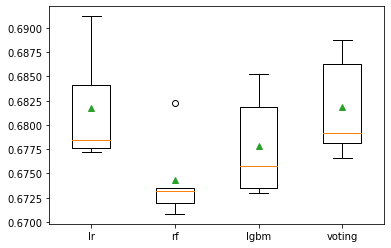

In [24]:
# plot model performance for comparison
plt.boxplot(train_cv, labels=names, showmeans=True)
plt.show()

In [25]:
# Set the filename
save_path = 'Models/'
name = 'voting_classifier'
file_name = save_path+name+'.mod'
# Write on disk
joblib.dump(voting, file_name, compress=3)

['Models/voting_classifier.mod']